11490434/11490434 [==============================] - 0s 0us/step


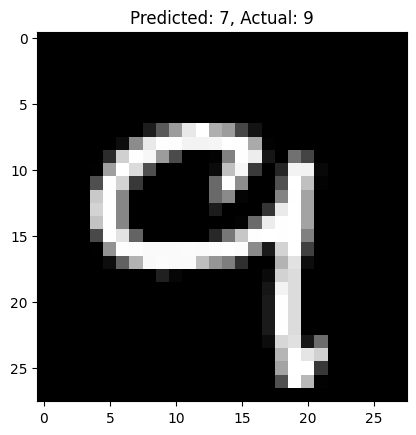

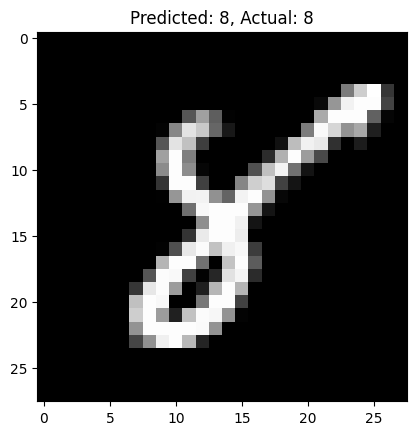

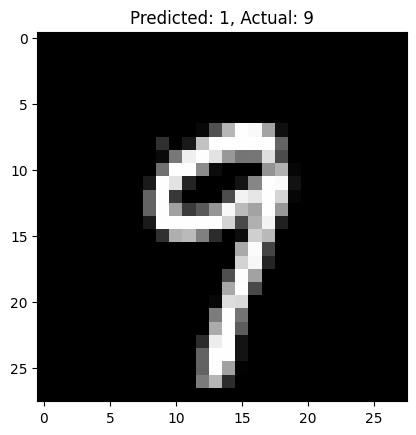

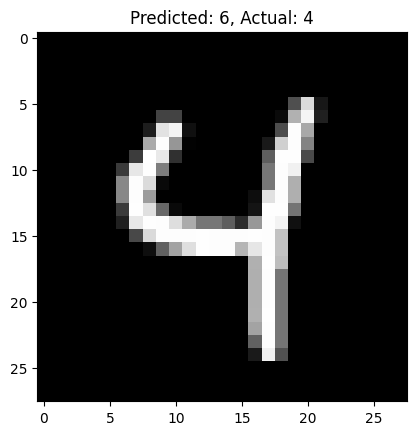

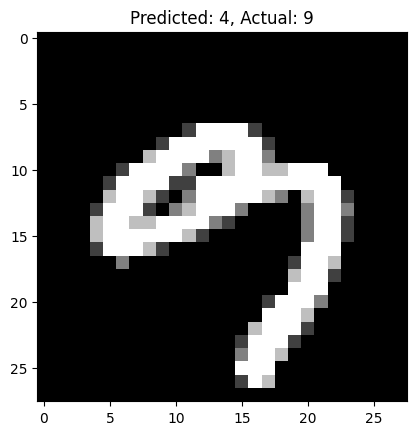

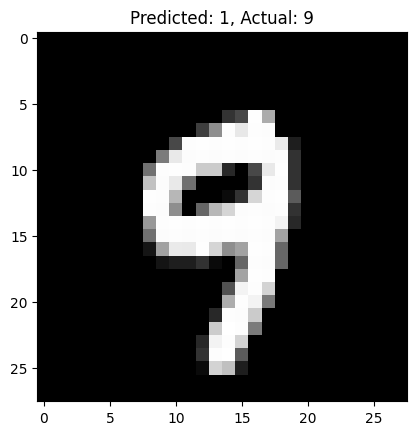

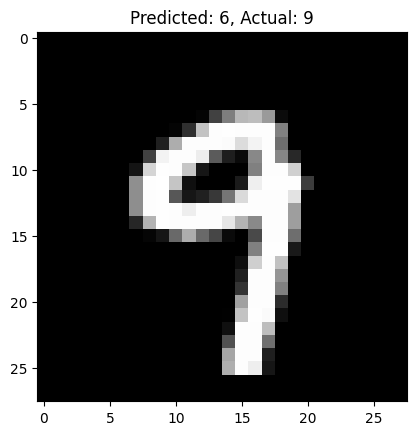

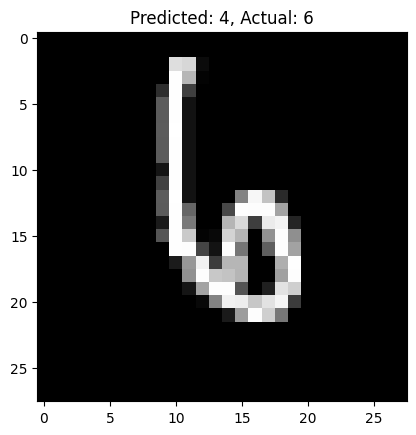

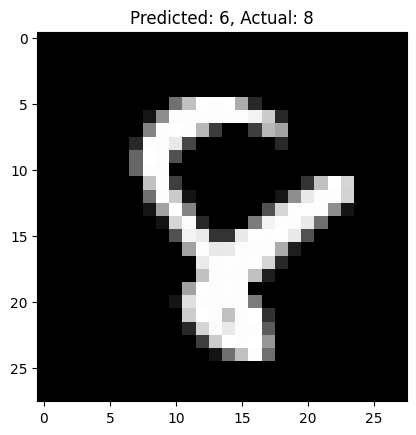

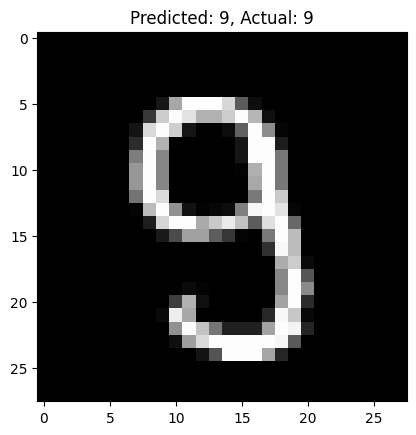

Accuracy on Test Set: 0.244


In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)

def derivative_ReLU(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

class NN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward_propagation(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = ReLU(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)

    def backward_propagation(self, X, Y):
        m = X.shape[0]

        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(self.A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * derivative_ReLU(self.Z1)
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def one_hot(self, y):
        return np.eye(self.output_size)[y]

    def train(self, X_train, Y_train, epochs):
        for epoch in range(epochs):
            self.forward_propagation(X_train)
            self.backward_propagation(X_train, Y_train)

    def predict(self, X):
        self.forward_propagation(X)
        return np.argmax(self.A2, axis=1)

    def accuracy(self, X, Y):
        predictions = self.predict(X)
        actual_labels = np.argmax(Y, axis=1)
        acc = np.mean(predictions == actual_labels)
        return acc

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

num_classes = 10
Y_train_one_hot = one_hot(Y_train, num_classes)

input_size = X_train_flat.shape[1]
hidden_size = 10
output_size = num_classes
learning_rate = 0.01

model = NN(input_size, hidden_size, output_size, learning_rate)
model.train(X_train_flat, Y_train_one_hot, epochs=1000)

num_samples_to_show = 10
random_indices = np.random.choice(X_test_flat.shape[0], num_samples_to_show, replace=False)

for idx in random_indices:
    sample_image = X_test_flat[idx]
    true_label = Y_test[idx]

    predicted_label = model.predict(sample_image.reshape(1, -1))[0]

    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Actual: {true_label}')
    plt.show()

X_test_flat = X_test_flat[:1000]
Y_test_one_hot = one_hot(Y_test[:1000], num_classes)
test_accuracy = model.accuracy(X_test_flat, Y_test_one_hot)
print(f'Accuracy on Test Set: {test_accuracy}')
